In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [3]:
test = pd.read_csv('Test.csv')
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


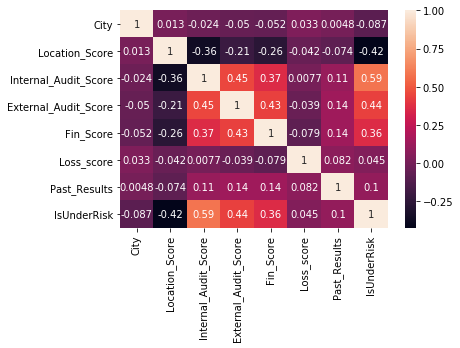

In [4]:
sns.heatmap(train.corr(), annot= True)

In [5]:
cor = train.corr()
corr_target = abs(cor['IsUnderRisk'])

In [6]:
features = corr_target[corr_target>0.1]
features

Location_Score          0.423956
Internal_Audit_Score    0.586097
External_Audit_Score    0.435619
Fin_Score               0.362463
Past_Results            0.102120
IsUnderRisk             1.000000
Name: IsUnderRisk, dtype: float64

In [101]:
x = train.drop('IsUnderRisk', axis = 1)
y = train['IsUnderRisk']

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(380, 7)
(163, 7)
(380,)
(163,)


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [104]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='liblinear')

In [12]:
lor.fit(x_train, y_train)

print(lor.score(x_train, y_train))
print(lor.score(x_test, y_test))

0.8105263157894737
0.8404907975460123


In [13]:
lor.classes_

array([0, 1], dtype=int64)

In [14]:
lor.predict_proba(x_test)

array([[1.23171295e-01, 8.76828705e-01],
       [7.56391162e-02, 9.24360884e-01],
       [2.04968329e-02, 9.79503167e-01],
       [3.62280198e-01, 6.37719802e-01],
       [8.17806903e-01, 1.82193097e-01],
       [2.87052214e-02, 9.71294779e-01],
       [1.19743828e-01, 8.80256172e-01],
       [8.97987462e-04, 9.99102013e-01],
       [2.55817791e-03, 9.97441822e-01],
       [4.41832100e-03, 9.95581679e-01],
       [6.92943537e-01, 3.07056463e-01],
       [1.84904605e-02, 9.81509540e-01],
       [5.49662509e-02, 9.45033749e-01],
       [7.64075097e-01, 2.35924903e-01],
       [2.88678124e-01, 7.11321876e-01],
       [1.29228612e-02, 9.87077139e-01],
       [9.43028054e-01, 5.69719457e-02],
       [2.54346228e-03, 9.97456538e-01],
       [1.74366697e-03, 9.98256333e-01],
       [1.12178188e-03, 9.98878218e-01],
       [8.07570707e-01, 1.92429293e-01],
       [2.01334025e-03, 9.97986660e-01],
       [2.27341949e-01, 7.72658051e-01],
       [9.35380474e-01, 6.46195257e-02],
       [8.241115

In [15]:
test_pred = lor.predict(test)

In [16]:
a = lor.predict_proba(test)

In [63]:
df1 = pd.DataFrame(a)
filepath = 'MySubmission.xlsx'
df1.to_excel(filepath, index = False)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
params = {'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5,6,7], 
          'min_samples_leaf':[1, 2, 3, 4, 5]}
grid = GridSearchCV(rf, param_grid= params, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [39]:
grid.best_score_

0.8526315789473685

In [40]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 2, min_samples_split= 5)
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9210526315789473
0.852760736196319


In [41]:
rf.predict_proba(x_test)

test_pred = rf.predict(test)

a = rf.predict_proba(test)

df1 = pd.DataFrame(a)
filepath = 'MySubmission3.xlsx'
df1.to_excel(filepath, index = False)